<a href="https://colab.research.google.com/github/dsklnr/Washington_Real_Estate/blob/Katie_Mears_Branch/FinalDraft_KM14APR2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group # 5 -
Benjamin Ogle, Marvin Moran, and Katie Mears**

# Libraries

In [ ]:

# Import the Pandas Library to load the data set 

import pandas as pd

# Import MinMaxScaler for Normalization 

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import matplotlib For plots: 

import matplotlib.pyplot as plt

In [ ]:
import os 
os.getcwd()

'/content'

Part I: Data Importing and Pre-processing:

In [ ]:
#import dataset as dataframe called salesdata using pandas commands

salesdata = pd.read_csv("/content/drive/MyDrive/house_sales.csv")
print(salesdata.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000  604000.0       4.0       3.00       1960.0   
4  1954400510  20150218T000000  510000.0       3.0       2.00       1680.0   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0    5650.0     1.0           0     0  ...      7        1180              0   
1    7242.0     2.0           0     0  ...      7        2170            400   
2   10000.0     1.0           0     0  ...      6         770              0   
3    5000.0     1.0           0     0  ...      7        1050            910   
4    8080.0     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [ ]:
# Print the dimensions of the dataset

print("Dimensions:", salesdata.shape)

Dimensions: (21613, 21)


In [ ]:
# Print the data types of each column

print("Data types:", salesdata.dtypes)

Data types: id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
# Print the file type of the dataset = Pandas Dataframe 

print("File type:", type(salesdata))

File type: <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Print the import method used

print("Import method:", "pd.read_csv(/content/drive/MyDrive/house_sales.csv)")

Import method: pd.read_csv(/content/drive/MyDrive/house_sales.csv)



Part II: Clean, Wrangle and handle missing data: 


In [ ]:
# Get info on salesdata dataframe

salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# Determine Null Values within salesdata by column  

missing_values = salesdata.isna().sum()
print(missing_values)

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [ ]:
# Total null datapoints 

num_missing = salesdata.isna().sum().sum()
print(num_missing)

4356


In [ ]:
# Calculate total missing data (%) 

percentage = (num_missing / 21613) * 100
rounded_pct = round(percentage, 2)
print(rounded_pct)

20.15


In [ ]:
# Removing Null data by Row

data_clean = salesdata.dropna()
print(data_clean)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0       3.0       1.00   
1      6414100192  20141209T000000  538000.0       3.0       2.25   
2      5631500400  20150225T000000  180000.0       2.0       1.00   
3      2487200875  20141209T000000  604000.0       4.0       3.00   
4      1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612  1523300157  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0           1180.0    5650.0     1.0           0     0  ...      7   
1           2570.0    7242.0   

In [ ]:
# Remove duplicates

data_clean2 = data_clean.drop_duplicates()
print(data_clean2)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0       3.0       1.00   
1      6414100192  20141209T000000  538000.0       3.0       2.25   
2      5631500400  20150225T000000  180000.0       2.0       1.00   
3      2487200875  20141209T000000  604000.0       4.0       3.00   
4      1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612  1523300157  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0           1180.0    5650.0     1.0           0     0  ...      7   
1           2570.0    7242.0   

In [ ]:
# Drop the columns "id" and "date" as they're not significant to the analysis and preventing correlation matrix to run 

droppedID = data_clean2.drop(["id", "date"], axis=1)
print(droppedID)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0       3.0       1.00       1180.0    5650.0     1.0   
1      538000.0       3.0       2.25       2570.0    7242.0     2.0   
2      180000.0       2.0       1.00        770.0   10000.0     1.0   
3      604000.0       4.0       3.00       1960.0    5000.0     1.0   
4      510000.0       3.0       2.00       1680.0    8080.0     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0       3.0       2.50       1530.0    1131.0     3.0   
21609  400000.0       4.0       2.50       2310.0    5813.0     2.0   
21610  402101.0       2.0       0.75       1020.0    1350.0     2.0   
21611  400000.0       3.0       2.50       1600.0    2388.0     2.0   
21612  325000.0       2.0       0.75       1020.0    1076.0     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1  

In [ ]:
# Calculate correlation matrix for all remaining variables (less id and date)

corr_matrix = droppedID.corr()
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308095   0.528322     0.705356  0.088484  0.260248   
bedrooms       0.308095  1.000000   0.514256     0.573338  0.030226  0.179843   
bathrooms      0.528322  0.514256   1.000000     0.755995  0.084713  0.503446   
sqft_living    0.705356  0.573338   0.755995     1.000000  0.165686  0.360198   
sqft_lot       0.088484  0.030226   0.084713     0.165686  1.000000 -0.001168   
floors         0.260248  0.179843   0.503446     0.360198 -0.001168  1.000000   
waterfront     0.283986 -0.001646   0.068368     0.114123  0.023793  0.024203   
view           0.404474  0.082227   0.185297     0.285908  0.069133  0.029629   
condition      0.033073  0.026811  -0.124877    -0.059621 -0.010947 -0.261784   
grade          0.670242  0.356103   0.668163     0.765616  0.108425  0.464855   
sqft_above     0.607853  0.474428   0.687308     0.876517  0.177583  0.531144   
sqft_bas

In [ ]:
# Filter the correlation matrix to show only values greater than 0.7
high_corr = corr_matrix[abs(corr_matrix) > 0.7]

# Print the columns with high correlation
print(high_corr.dropna(how='all', axis=1).dropna(how='all', axis=0))

                  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price          1.000000       NaN        NaN     0.705356       NaN     NaN   
bedrooms            NaN       1.0        NaN          NaN       NaN     NaN   
bathrooms           NaN       NaN   1.000000     0.755995       NaN     NaN   
sqft_living    0.705356       NaN   0.755995     1.000000       NaN     NaN   
sqft_lot            NaN       NaN        NaN          NaN  1.000000     NaN   
floors              NaN       NaN        NaN          NaN       NaN     1.0   
waterfront          NaN       NaN        NaN          NaN       NaN     NaN   
view                NaN       NaN        NaN          NaN       NaN     NaN   
condition           NaN       NaN        NaN          NaN       NaN     NaN   
grade               NaN       NaN        NaN     0.765616       NaN     NaN   
sqft_above          NaN       NaN        NaN     0.876517       NaN     NaN   
sqft_basement       NaN       NaN        NaN        

#Rationale:
Based on the high correlation matrix which was set to show only variables with correlations exceeding 0.7, it was determined to include price, bedrooms, bathrooms, sqft_living, sqft_lot, yr_built, and zipcode and exclude all others. Bedrooms showed no high correlation. Price showed strong correlation with sqft_living. Sqft_living showed strong correlation with price, bathrooms, grade, sqft_above, and sqft_living15. With that information it was decided to remove grade, sqft_above, and sqft_living15. Many variables showed no correlation to any of the variables and held no analytical value and where therefore removed. The goal of removing these columns is to make the data set easier to manage and develop a more efficient and accurate analysis.

In [ ]:
# Removing columns that are to be excluded from analysis, check counts. 

subset = droppedID[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']]
subset.count()

price          17618
bedrooms       17618
bathrooms      17618
sqft_living    17618
sqft_lot       17618
yr_built       17618
zipcode        17618
dtype: int64

# Check the number of unique values in a column:
Note:  If the number of unique values in a column is large, the distribution of values is skewed, or the granularity of the data is too fine-grained, you may need to aggregate the data. 
Similarly, if the dataset is very large, aggregation may be necessary to reduce the size of the dataset for easier analysis or visualization.

In [ ]:
print(subset['price'].nunique())
print(subset['bedrooms'].nunique())
print(subset['bathrooms'].nunique())
print(subset['sqft_living'].nunique())
print(subset['sqft_lot'].nunique())
print(subset['yr_built'].nunique())
print(subset['zipcode'].nunique())

3574
12
29
950
8530
116
70


# Aggregation - Descriptive Stats 

In [ ]:
# To perform aggregation, a descriptive statistics table was derived for the 7 remaining variables. 

stats_table = subset.describe().round(2)
print(stats_table)

            price  bedrooms  bathrooms  sqft_living    sqft_lot  yr_built  \
count    17618.00  17618.00   17618.00     17618.00    17618.00  17618.00   
mean    541643.73      3.38       2.11      2083.48    15140.85   1970.82   
std     368718.59      0.94       0.77       918.74    42288.64     29.37   
min      75000.00      0.00       0.00       370.00      520.00   1900.00   
25%     323425.00      3.00       1.75      1430.00     5050.00   1951.00   
50%     450000.00      3.00       2.25      1920.00     7620.00   1974.00   
75%     646000.00      4.00       2.50      2550.00    10659.75   1997.00   
max    7700000.00     33.00       8.00     12050.00  1651359.00   2015.00   

        zipcode  
count  17618.00  
mean   98078.22  
std       53.50  
min    98001.00  
25%    98033.00  
50%    98065.00  
75%    98118.00  
max    98199.00  


# Normalization 
Normalization is the process of scaling numeric data to a common range. It is a common preprocessing step in machine learning to improve the performance of models that use distance-based measures.

## Normalization via Z-score scaling.
The resulting output shows the scaled values for each column.
Z-score scaling was selected for the scaling method as it applies to distributions that are not uniformly distributed. 

In [ ]:
# create a Z score StandardScaler object based on Z score 

z_score_scaler = StandardScaler()

# fit and transform the data using the Z score Z scaler

scaled_data = z_score_scaler.fit_transform(subset)
print(scaled_data)

[[-0.86720011 -0.4005291  -1.44919388 ... -0.22443666 -0.53890867
   1.86509295]
 [-0.00988243 -0.4005291   0.17656531 ... -0.18678955 -0.67512711
   0.87444179]
 [-0.98084013 -1.46840467 -1.44919388 ... -0.12156924 -1.28811007
  -0.93863677]
 ...
 [-0.37846394 -1.46840467 -1.77434572 ... -0.32612169  1.3000402
   1.22958088]
 [-0.38416221 -0.4005291   0.50171715 ... -0.3015754   1.12976715
  -0.9573283 ]
 [-0.58757514 -1.46840467 -1.77434572 ... -0.33260116  1.26598559
   1.22958088]]


In [ ]:
# assign the scaled data to new dataframe called subset_znorm

subset_znorm = pd.DataFrame(scaled_data)
subset_znorm = pd.DataFrame(scaled_data, columns=subset_znorm.columns)

# print the scaled dataframe
print(subset_znorm)

              0         1         2         3         4         5         6
0     -0.867200 -0.400529 -1.449194 -0.983425 -0.224437 -0.538909  1.865093
1     -0.009882 -0.400529  0.176565  0.529565 -0.186790 -0.675127  0.874442
2     -0.980840 -1.468405 -1.449194 -1.429702 -0.121569 -1.288110 -0.938637
3      0.169121  0.667346  1.152021 -0.134409 -0.239808 -0.198363  1.080049
4     -0.085823 -0.400529 -0.148587 -0.439184 -0.166973  0.550839 -0.078826
...         ...       ...       ...       ...       ...       ...       ...
17613 -0.492649 -0.400529  0.501717 -0.602456 -0.331301  1.300040  0.463228
17614 -0.384162  0.667346  0.501717  0.246560 -0.220582  1.470313  1.266964
17615 -0.378464 -1.468405 -1.774346 -1.157582 -0.326122  1.300040  1.229581
17616 -0.384162 -0.400529  0.501717 -0.526262 -0.301575  1.129767 -0.957328
17617 -0.587575 -1.468405 -1.774346 -1.157582 -0.332601  1.265986  1.229581

[17618 rows x 7 columns]


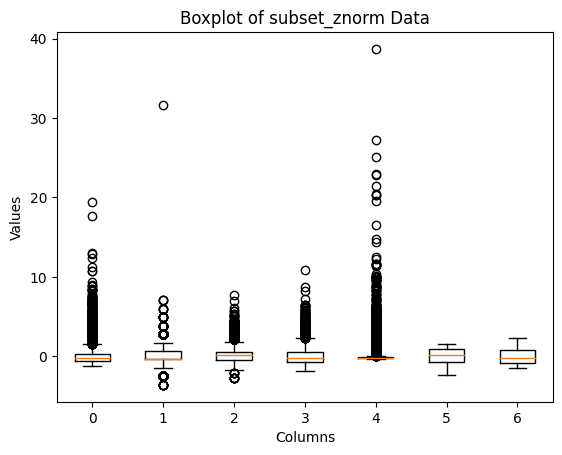

In [ ]:
# Create a box plot of based on normalized data (subset_znorm dataset)


fig, ax = plt.subplots()
ax.boxplot(subset_znorm)
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
ax.set_title('Box Plot')

# set the x-axis tick labels
plt.xticks(range(1, len(subset_znorm.columns) + 1), subset_znorm.columns)

# add a title and axis labels
plt.title('Boxplot of subset_znorm Data')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.show()

In [ ]:
# assign the scaled data to new dataframe called subset_znorm

subset_znorm = pd.DataFrame(scaled_data)
subset_znorm = pd.DataFrame(scaled_data, columns=subset_znorm.columns)

# print the scaled dataframe
print(subset_znorm)

              0         1         2         3         4         5         6
0     -0.867200 -0.400529 -1.449194 -0.983425 -0.224437 -0.538909  1.865093
1     -0.009882 -0.400529  0.176565  0.529565 -0.186790 -0.675127  0.874442
2     -0.980840 -1.468405 -1.449194 -1.429702 -0.121569 -1.288110 -0.938637
3      0.169121  0.667346  1.152021 -0.134409 -0.239808 -0.198363  1.080049
4     -0.085823 -0.400529 -0.148587 -0.439184 -0.166973  0.550839 -0.078826
...         ...       ...       ...       ...       ...       ...       ...
17613 -0.492649 -0.400529  0.501717 -0.602456 -0.331301  1.300040  0.463228
17614 -0.384162  0.667346  0.501717  0.246560 -0.220582  1.470313  1.266964
17615 -0.378464 -1.468405 -1.774346 -1.157582 -0.326122  1.300040  1.229581
17616 -0.384162 -0.400529  0.501717 -0.526262 -0.301575  1.129767 -0.957328
17617 -0.587575 -1.468405 -1.774346 -1.157582 -0.332601  1.265986  1.229581

[17618 rows x 7 columns]


## Normalization via MinMaxScaler 

In [ ]:
# Create a MinMaxScaler object based on Min Max Scaling 
scaler = MinMaxScaler()
minmaxnormalized_data = scaler.fit_transform(subset)
print(minmaxnormalized_data)

[[1.92655738e-02 9.09090909e-02 1.25000000e-01 ... 3.10751079e-03
  4.78260870e-01 8.93939394e-01]
 [6.07213115e-02 9.09090909e-02 2.81250000e-01 ... 4.07186891e-03
  4.43478261e-01 6.26262626e-01]
 [1.37704918e-02 6.06060606e-02 1.25000000e-01 ... 5.74253455e-03
  2.86956522e-01 1.36363636e-01]
 ...
 [4.28984918e-02 6.06060606e-02 9.37500000e-02 ... 5.02774650e-04
  9.47826087e-01 7.22222222e-01]
 [4.26229508e-02 9.09090909e-02 3.12500000e-01 ... 1.13154584e-03
  9.04347826e-01 1.31313131e-01]
 [3.27868852e-02 6.06060606e-02 9.37500000e-02 ... 3.36798440e-04
  9.39130435e-01 7.22222222e-01]]


In [ ]:
# assign the scaled data to new dataframe called subset_mnorm

minmaxnormalized_data = pd.DataFrame(minmaxnormalized_data)
minmaxnormalized_data = pd.DataFrame(minmaxnormalized_data, columns=minmaxnormalized_data.columns)

# print the scaled dataframe
print(minmaxnormalized_data)

              0         1        2         3         4         5         6
0      0.019266  0.090909  0.12500  0.069349  0.003108  0.478261  0.893939
1      0.060721  0.090909  0.28125  0.188356  0.004072  0.443478  0.626263
2      0.013770  0.060606  0.12500  0.034247  0.005743  0.286957  0.136364
3      0.069377  0.121212  0.37500  0.136130  0.002714  0.565217  0.681818
4      0.057049  0.090909  0.25000  0.112158  0.004579  0.756522  0.368687
...         ...       ...      ...       ...       ...       ...       ...
17613  0.037377  0.090909  0.31250  0.099315  0.000370  0.947826  0.515152
17614  0.042623  0.121212  0.31250  0.166096  0.003206  0.991304  0.732323
17615  0.042898  0.060606  0.09375  0.055651  0.000503  0.947826  0.722222
17616  0.042623  0.090909  0.31250  0.105308  0.001132  0.904348  0.131313
17617  0.032787  0.060606  0.09375  0.055651  0.000337  0.939130  0.722222

[17618 rows x 7 columns]


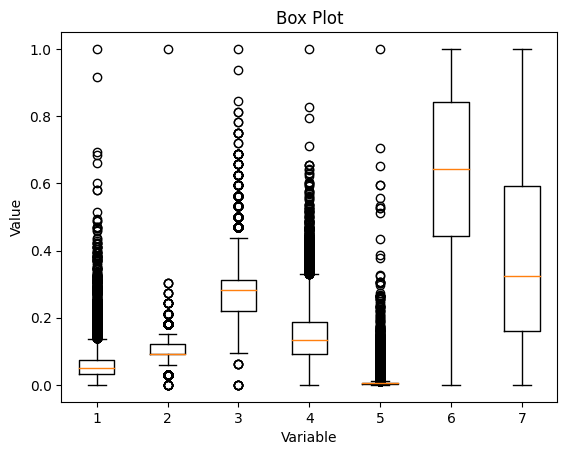

In [ ]:
# Create a box plot of Min Max Normalized Data

fig, ax = plt.subplots()
ax.boxplot(minmaxnormalized_data)
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
ax.set_title('Box Plot')
plt.show()

# Rationale: 
It was determined that there were no feature construction techniques needed to be applied to this data set. 
It was also determined that there was no need for discretization to be performed as there was no need to convert
continuous variables into categorical variables in this analysis. 


# *Appendix:* 

In [ ]:
# save original salesdata dataframe as CSV file in working directory

salesdata.to_csv('original_df.csv', index=False)

In [ ]:
# save subset data frame to CSV file

subset.to_csv('final_df.csv', index=False)

# Granularity 

In [ ]:
# Check the granularity of the subset data - Determines the need for aggregation. 

print(subset['price'].min(), subset['price'].max())
print(subset['bedrooms'].min(), subset['bedrooms'].max())
print(subset['bathrooms'].min(), subset['bathrooms'].max())
print(subset['sqft_living'].min(), subset['sqft_living'].max())
print(subset['sqft_lot'].min(), subset['sqft_lot'].max())
print(subset['yr_built'].min(), subset['yr_built'].max())
print(subset['zipcode'].min(), subset['zipcode'].max())

75000.0 7700000.0
0.0 33.0
0.0 8.0
370.0 12050.0
520.0 1651359.0
1900 2015
98001 98199


# Skewness 

Calculate the skewness of a column based on non-normalized data (subset dataset)
Skewness from Pandas:
The skew() function in Pandas can be used to calculate the skewness of a sample distribution. The function returns a value that indicates the degree of skewness. If the value is positive, the distribution is skewed to the right (i.e., it has a long right tail). If the value is negative, the distribution is skewed to the left (i.e., it has a long left tail). If the value is close to zero, the distribution is approximately symmetric.

In [ ]:
df = pd.DataFrame(subset)
skewness = df.skew()
skew_summary = pd.DataFrame({'Skewness': skewness})
print(skew_summary)

              Skewness
price         3.916013
bedrooms      2.245520
bathrooms     0.490866
sqft_living   1.406860
sqft_lot     13.440280
yr_built     -0.455818
zipcode       0.398600


# Plots 

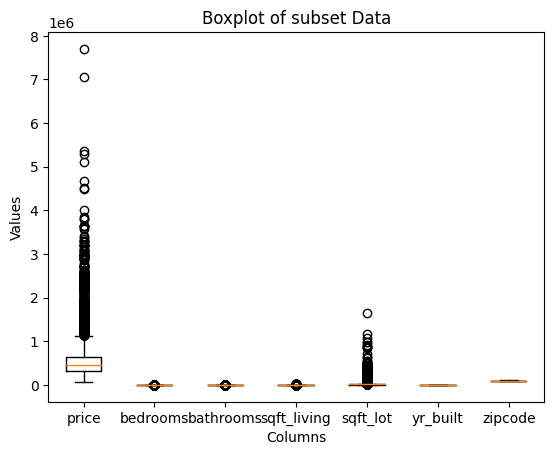

In [ ]:
# Create a box plot of based on non-normalized data (subset dataset)


fig, ax = plt.subplots()
ax.boxplot(subset)
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
ax.set_title('Box Plot')

# set the x-axis tick labels
plt.xticks(range(1, len(subset.columns) + 1), subset.columns)

# add a title and axis labels
plt.title('Boxplot of subset Data')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.show()

In [ ]:
# save the subset_znorm dataframe as a CSV file

subset_znorm.to_csv('subset_znorm.csv', index=False)

In [ ]:
# save the minmaxnormalized_data dataframe as a CSV file

minmaxnormalized_data.to_csv('minmaxnormalized_data.csv', index=False)